In [14]:
from sklearn import datasets

In [15]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

In [16]:
X = digits.data
y = digits.target

In [17]:
#digits dataset has 1797 8x8 images, to use in in scikit we have to reshape it to 2D array
#transform each 8x8 image into a feature vector of length 64

digits = digits.images.reshape((digits.images.shape[0], -1))

In [18]:
digits.shape

(1797, 64)

In [20]:
X.shape

(1797, 64)

In [21]:
y.shape

(1797,)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

X_train.shape, y_train.shape

((1617, 64), (1617,))

In [23]:
X_test.shape, y_test.shape

((180, 64), (180,))

In [25]:
knn = KNeighborsClassifier().fit(X_train, y_train) 
knn.score(X_train, y_train)

0.9907235621521335

In [28]:
knn.score(X_test, y_test)

0.9888888888888889

In [27]:
import numpy as np
predicted = knn.predict(X_test)
np.mean(predicted == y_test)

0.9888888888888889

In [29]:
#computing cross validation metrics
from sklearn.model_selection import cross_val_score
from sklearn import metrics
scores = cross_val_score(knn, X_train, y_train, cv=5)
scores

array([0.99390244, 0.9876161 , 0.97826087, 0.99378882, 0.98136646])

In [30]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.01)


In [32]:
scores_test = cross_val_score(knn, X_test, y_test, cv=5)
scores_test

array([0.875     , 0.94871795, 0.91428571, 0.88235294, 0.875     ])

In [33]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_test.mean(), scores_test.std() * 2))

Accuracy: 0.90 (+/- 0.06)


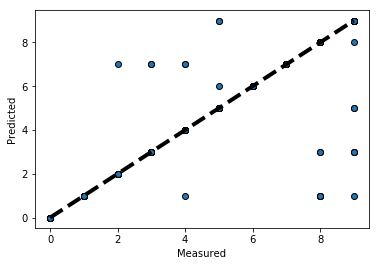

In [36]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

X = X_train
y = y_train

predicted = cross_val_predict(knn, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [42]:
from sklearn import linear_model
regr = linear_model.LogisticRegression().fit(X_train, y_train)
regr.score(X_train, y_train)

0.9944341372912802

In [43]:
print(regr.coef_)

[[ 0.00000000e+00 -4.66425776e-02 -3.30389125e-02  2.44893449e-02
  -8.60166214e-02 -3.16212774e-01 -1.95689006e-01 -2.89604050e-02
  -1.89933359e-05 -1.42094765e-01  2.12004881e-02  1.49404444e-01
   2.07389744e-01  1.81037369e-01 -9.94526664e-04 -2.80278514e-02
  -6.02361730e-03  1.88266708e-02  1.51555644e-01 -2.96013925e-02
  -3.41507660e-01  2.47481038e-01 -2.84456487e-02 -5.25993730e-03
  -3.00959381e-03  3.94862997e-02 -1.78230859e-02 -1.55727881e-01
  -6.50391802e-01  1.21963159e-01 -5.29130609e-02 -2.43648189e-04
   0.00000000e+00  1.83941701e-01  1.18364460e-01 -1.22859857e-01
  -6.04223633e-01 -5.99409657e-02  1.68007504e-02  0.00000000e+00
  -1.20378218e-03 -4.48360799e-02  2.84723550e-01 -3.06313056e-01
  -3.43885889e-01 -8.20705034e-02  6.75813386e-02 -1.99085912e-04
  -1.89142094e-03 -1.77910132e-01  9.37097856e-02 -1.80165431e-01
   1.01669502e-01 -5.98571377e-02 -1.43813801e-01 -6.49385996e-02
  -4.95034579e-06 -5.63910910e-02 -2.24103177e-01  1.43683836e-01
  -1.93648

In [44]:
regr.score(X_test, y_test)

0.9666666666666667

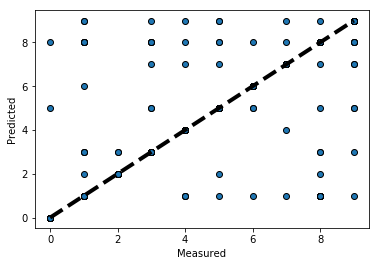

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

X = X_train
y = y_train

predicted = cross_val_predict(regr, X, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [1]:
#all in one
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#load dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

#reshape dataset
digits = digits.images.reshape((digits.images.shape[0], -1))


#split for train and test, leave out 10% for test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

#build cllasifiers
knn = KNeighborsClassifier().fit(X_train, y_train)
regr = linear_model.LogisticRegression().fit(X_train, y_train)

print('KNN score: %f' % knn.score(X_test, y_test))
print('LogisticRegression score: %f' % regr.score(X_test, y_test))


KNN score: 0.988889
LogisticRegression score: 0.966667


In [11]:
#Task: On the digits dataset, plot the cross-validation score of a SVC estimator with an linear kernel 
#as a function of parameter C (use a logarithmic grid of points, from 1 to 10).

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import svm

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()


for x in C_s:
    clf = svm.SVC(kernel='linear', C=x)
    clf.fit(X_train, y_train)
    cv_score = cross_val_score(clf, X, y)
    scores.append(np.mean(cv_score))
    scores_std.append(np.std(cv_score))
    print("score with C = {} is {}".format(x, cv_score))




score with C = 1e-10 is [0.1013289  0.10183639 0.26342282]
score with C = 1.2915496650148826e-09 is [0.1013289  0.10183639 0.26342282]
score with C = 1.6681005372000592e-08 is [0.1013289  0.10183639 0.26342282]
score with C = 2.1544346900318867e-07 is [0.1013289  0.10183639 0.26342282]
score with C = 2.782559402207126e-06 is [0.1013289  0.10183639 0.26342282]
score with C = 3.5938136638046256e-05 is [0.90697674 0.9015025  0.89932886]
score with C = 0.0004641588833612782 is [0.95348837 0.96160267 0.9295302 ]
score with C = 0.005994842503189421 is [0.93853821 0.95826377 0.93791946]
score with C = 0.07742636826811278 is [0.93521595 0.95826377 0.93791946]
score with C = 1.0 is [0.93521595 0.95826377 0.93791946]


(0, 1.1)

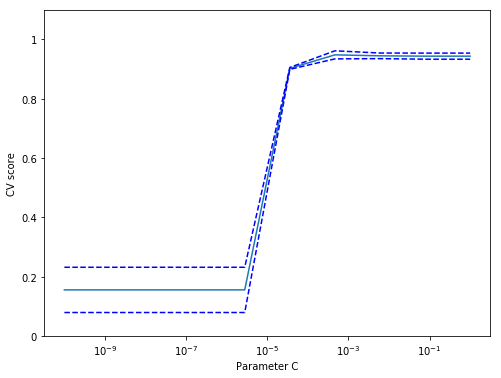

In [12]:
#plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8, 6))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
